# <font color=navy> 8. Bayesian Linear Regression 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "./data/"
ad = pd.read_csv(data_path + "Advertising.csv")

In [4]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 8.1 Linear regression model 

### Example: Advertising 
- TV광고 외에 라디오와 신문광고에 대한 지출도 활용하여 sales를 설명하고 싶음 
- 설명변수 각각을 사용하여 3개의 단순회귀분석 사용??  (No!)
    - 서로 다른 광고매체의 예산은 다른 회귀방정식과 연관 
$$ y_i= \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots + \beta_p x_{pi} +\epsilon_i $$

$$ \mathbf y = X\mathbf \beta + \mathbf \epsilon,  ~~E(\mathbf \epsilon)=\mathbf 0, Var(\mathbf \epsilon) = \sigma^2 I$$ 

- 추정된 회귀식
$$ \hat y_i = \hat  \beta_0 + \hat\beta_1 x_{1i} + \hat\beta_2 x_{2i} + \cdots +\hat \beta_p x_{pi} $$
$$ \hat {\mathbf y} = X \hat {\mathbf \beta} $$ 


### Least square estimation (LSE) 

- RSS를 최소화 하는 최소제곱법 사용 
$$ RSS=\sum (y_i - \hat y)^2 = \sum (y_i - \hat \beta_0 - \hat \beta_1 x_{i1} - \cdots - \hat \beta_p x_{ip})^2 $$
$$ RSS = (\mathbf y - X \hat {\mathbf \beta})'(\mathbf y - X \hat {\mathbf \beta})$$
$$\hat {\mathbf \beta} = (X'X)^{-1}X'\mathbf y$$
<img src='http://drive.google.com/uc?export=view&id=1aXBr2nn7CYgchvqbIr_MsvDV5jiGCvE-' width = 400/><br>

### Maximum likelihood estimation (MLE)

$$ \mathbf y = X\mathbf \beta + \mathbf \epsilon,  ~~\mathbf \epsilon \sim N(\mathbf 0, \sigma^2 I)$$ 
$$ L(\mathbf \beta, \sigma^2) \propto (\sigma^2)^{-n/2} \exp \left( - \frac 1 {2\sigma^2} (\mathbf y - X\mathbf \beta)'(\mathbf y - X\mathbf \beta)\right) $$

- $L(\mathbf \beta, \sigma^2) $를 최대화 하는 $\mathbf \beta$는 RSS를 최소화 하는 $\mathbf \beta$와 동일

In [5]:
model = smf.ols('Sales ~ Radio + Newspaper + TV', data = ad).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        17:35:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8.2 Bayesian linear regression

$$ L(\mathbf \beta,\sigma^2) \propto (\sigma^2)^{-v/2} \exp\left( - \frac{vs^2}{2\sigma^2}\right) (\sigma^2)^{-\frac{n-v}{2}} \exp \left( - \frac 1 {2\sigma^2} (\mathbf \beta - \hat {\mathbf \beta})'(X'X) (\mathbf \beta - \hat {\mathbf \beta})\right) $$


$$ s^2 = \frac 1 {v} (\mathbf y - X \hat {\mathbf \beta})'(\mathbf y - X \hat {\mathbf \beta}) $$
$$ v = n-k$$

### 8.2.1 Noninformative prior를 사용 
- $(\mathbf \beta, \log \sigma^2)$에 uniform prior를 할당
$$ p(\mathbf \beta,  \sigma^2 | X) \propto \sigma^{-2} $$

#### Conditional posterior distribution of $\mathbf \beta$ given $\sigma^2$
$$ \mathbf \beta | \sigma^2, y \sim N( \hat {\mathbf \beta }, V_\beta \sigma^2)$$

$$\hat {\mathbf \beta} = (X'X)^{-1}X'\mathbf y$$
$$ V_\beta = (X'X)^{-1}$$

#### Marginal posterior distribution of $\sigma^2$ 
$$ \sigma^2 | y \sim \mbox{Inv-}\chi^2 (n-k, s^2)$$


### 8.2.2 Conjugate prior
$$ p(\beta, \sigma^2 ) = p(\sigma^2 ) p(\beta| \sigma^2)$$

-  Prior of $\sigma^2$: Scaled Inv-$\chi^2(\nu_0, s_0^2)$
$$ p(\sigma^2) \propto (\sigma^2)^{- \frac{\nu_0}{2}-1} \exp \left( - \frac{\nu_0 s_0^2}{2\sigma^2}\right)$$

- Conditional prior of $\beta$: $N(\mu_0, \sigma^2 \Lambda_0^{-1})$
$$ p(\beta|\sigma^2) \propto (\sigma^2)^{-k/2} \exp \left( - \frac 1 {\sigma^2} (\mathbf\beta-\mathbf\mu_0)'\Lambda_0 (\mathbf\beta-\mathbf\mu_0)\right)$$

#### Posterior distribution 
$$ p(\beta, \sigma^2|X ) = p(\sigma^2|X) p(\beta| \sigma^2, X) \propto \mbox{Inv-Gamma}(a_n, b_n) N(\mu_n, \sigma^2 \Lambda_n^{-1})$$


### Example: Simulation 

- 아래의 식에서 데이터를 생성

$y=2+6x  + \epsilon, ~~\epsilon\sim Unif(0,1) $


In [4]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
niter = 10000
with pm.Model() as linreg:
    a = pm.Normal('a', mu=0, sd=100)
    b = pm.Normal('b', mu=0, sd=100)
    sigma = pm.HalfNormal('sigma', sd=1)

    y_est = a*x + b
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)

    trace = pm.sample(niter, random_seed=123)

<ipython-input-5-23e1da0227d8>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(niter, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/yeojinchung/.pyenv/versions/python_sfds/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/yeojinchung/.pyenv/versions/python_sfds/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 264 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8819676460443788, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

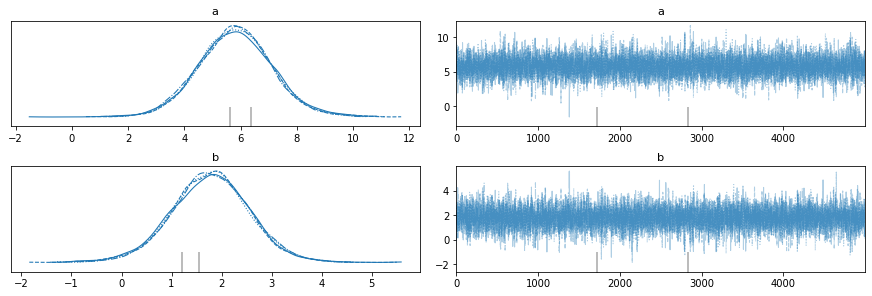

In [10]:
t = trace[niter//2:]
pm.plot_trace(t, var_names=['a', 'b'])

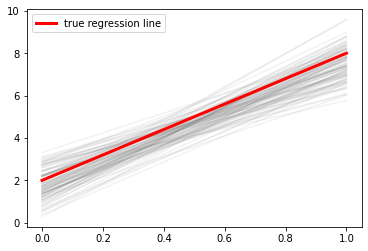

In [11]:
for a_, b_ in zip(t['a'][-100:], t['b'][-100:]):
    plt.plot(x, a_*x + b_, c='gray', alpha=0.1)
plt.plot(x, _a*x + _b, label='true regression line', lw=3., c='red')
plt.legend(loc='best')

빨간선은 관측값을 이용한 직선을 만든 것이고 나머지는 sample값들을 이용하여 만든 직선들이다.\
일반적으로 B0와 B1을 몇으로 추정할 것인지 Posterior mean을 이용하여 추정했을 것이다.(하나의 방법)\
likelihood function에 따라 loss함수를 정의하자


### Example: Financial prediction

- 미래의 주가수익률을 예측하기 위한 모형을 만들려고 한다. 예측 정확도는 수익/손실과 직접적으로 관련이 된다. 
- 실제 주가수익률이 0.01이라고 하자. 만일 squared error loss를 사용한다면 0.03으로 예측한 경우와 -0.01로 예측한 경우에 동일한 loss를 적용한다. 

$$ (0.01 - (-0.01))^2 = (0.01 - 0.03)^2 = 0.004$$

- 만일 예측치에 따라 투자를 진행한다면 
    - 0.03으로 예측: 기대보단 낮지만 0.01만큼 수익 발생
    - -0.01으로 예측: 수익이 나지 않을 것으라 기대하여 넣지 않았으므로 손실 발생 
- 예측된 수익률과 실제 수익률의 방향성을 고려하여 loss 함수를 정의하자.     

$$L(y, \hat y) = \left\{ 
\begin{matrix} 
\alpha * \hat y ^2 - sign(y)*\hat y + |y| & \mbox{if } y\cdot \hat y <0\\
|y-\hat y| & \mbox{if } y\cdot \hat y \geq 0
\end{matrix}
\right.$$

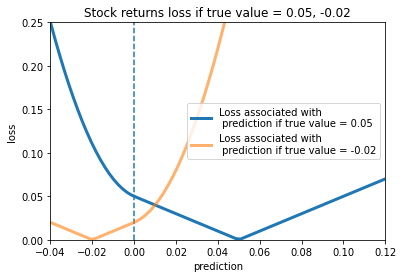

In [12]:
def stock_loss(true_return, yhat, alpha = 100.):
    if true_return * yhat < 0:
        return alpha*yhat**2 - np.sign(true_return)*yhat \
                        + abs(true_return) 
    else:
        return abs(true_return - yhat)
    
    
true_value = .05
pred = np.linspace(-.04, .12, 75)

plt.plot(pred, [stock_loss(true_value, _p) for _p in pred], \
        label = "Loss associated with\n prediction if true value = 0.05", lw =3) 
plt.vlines(0, 0, .25, linestyles="--")

plt.xlabel("prediction")
plt.ylabel("loss")
plt.xlim(-0.04, .12)
plt.ylim(0, 0.25)

true_value = -.02
plt.plot(pred, [stock_loss(true_value, _p) for _p in pred], alpha = 0.6, \
        label = "Loss associated with\n prediction if true value = -0.02", lw =3) 
plt.legend()
plt.title("Stock returns loss if true value = 0.05, -0.02");

부호가 같을 때는 일정한 loss값을 가지지만 부호가 달라지면 급격하게 loss가 증가한다.

- 실제 수익률과 다른 방향으로 예측을 하게 되면 loss가 빠르게 증가하도록 설계 
- 같은 방향으로 예측했다고 하더라도 정확도에 따라 loss가 달라지도록 설계

- trading signal과 주가수익률 간의 관계를 위의 loss함수를 사용하여 선형회귀모형으로 추정한다.
- 단, 대부분의 금융데이터의 관계는 선형관계가 아니기 때문에 아래의 예에서는 simulation을 통해 생성한 데이터를 사용한다. 


b ~ Normal

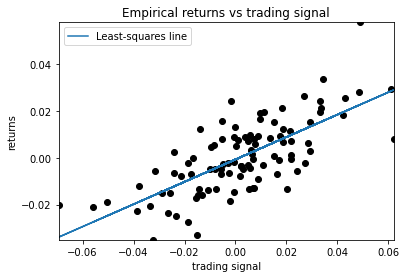

In [13]:
## Code to create artificial data
N = 100
X = 0.025*np.random.randn(N)
Y = 0.5*X + 0.01*np.random.randn(N)  # beta=0.5, alpha=0, error=0.01


ls_coef_ = np.cov(X, Y)[0,1]/np.var(X) # LSE for the slope == smf.ols --> rss 최소화 하는 lse구하는 식
ls_intercept = Y.mean() - ls_coef_*X.mean() # LSE for the intercept

plt.scatter(X, Y, c="k")
plt.xlabel("trading signal")
plt.ylabel("returns")
plt.title("Empirical returns vs trading signal")
plt.plot(X, ls_coef_*X + ls_intercept, label = "Least-squares line")
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.legend(loc="upper left");b

#### Model 
$$ R = \alpha + \beta x + \epsilon$$
$$ \epsilon|\sigma \sim N(0, \sigma^2) $$ 
$$ \alpha \sim N(0, 100^2)$$
$$ \beta \sim N(0, 100^2)$$
$$ \sigma \sim \mbox{Unif}(0,100)$$


In [15]:
import pymc3 as pm

with pm.Model() as model:
    std = pm.Uniform("std", 0, 100)
    
    beta = pm.Normal("beta", mu=0, sd=100)
    alpha = pm.Normal("alpha", mu=0, sd=100)
    
    mean = pm.Deterministic("mean", alpha + beta*X)
    
    obs = pm.Normal("obs", mu=mean, sd=std, observed=Y)
    
    trace = pm.sample(20000, step=pm.Metropolis())
#     burned_trace = trace[20000:]  

<ipython-input-15-cffb7aaf6624>:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(20000, step=pm.Metropolis())
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
>Metropolis: [std]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 346 seconds.
The number of effective samples is smaller than 10% for some parameters.


/Users/yeojinchung/.pyenv/versions/python_sfds/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/yeojinchung/.pyenv/versions/python_sfds/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


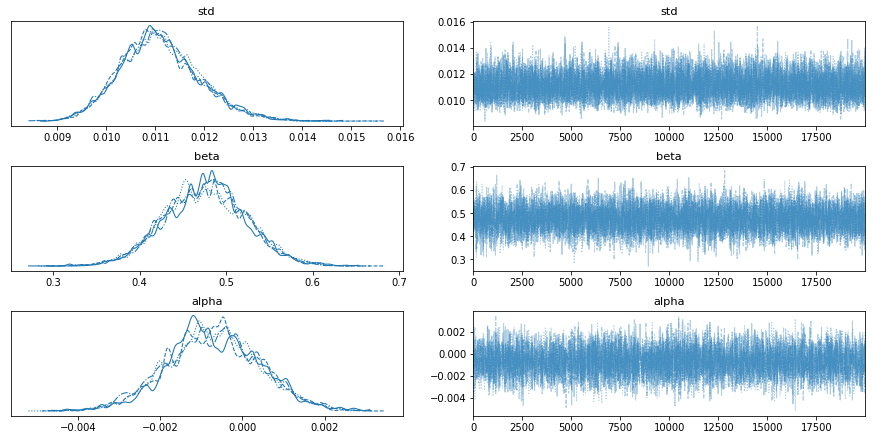

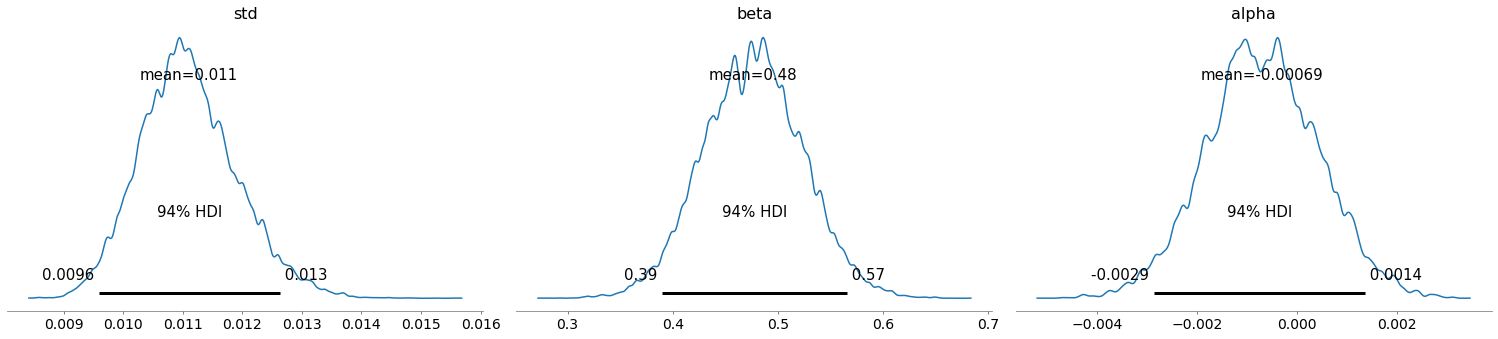

In [19]:
pm.plot_trace(trace, var_names=["std", "beta", "alpha"])
pm.plot_posterior(trace, var_names=["std", "beta", "alpha"]);

-  MCMC가 수렴한 것으로 보인다. 
- 특정한   trading signal($x$)에 대해 수익률은 $i$번째 posterior sample을 활용하여 수익율을 아래와 같이 표현할 수 있다. 
$$R_i(x) =  \alpha_i + \beta_ix + \epsilon $$\
$\epsilon \sim \text{Normal}(0, \sigma_i)$ 


- 위에서 정의한 loss function을 posterior sample을 활용하여 기대값을 계산하고 이를 최소화 하는 수익률 예측치를 구하자.
$$ \arg \min_{r} \;\;E_{R(x)}\left[ \; L(R(x), r) \; \right] $$


In [ ]:
from scipy.optimize import fmin


def stock_loss(price, pred, coef = 500):
    """vectorized for numpy"""
    sol = np.zeros_like(price)
    ix = price*pred < 0 
    sol[ix] = coef*pred**2 - np.sign(price[ix])*pred + abs(price[ix])
    sol[~ix] = abs(price[~ix] - pred)
    return sol

std_samples = burned_trace["std"]
alpha_samples = burned_trace["alpha"]
beta_samples = burned_trace["beta"]

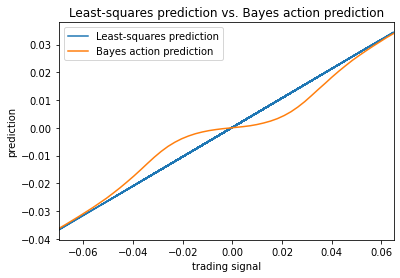

In [24]:
N = std_samples.shape[0]

noise = std_samples*np.random.randn(N) 

possible_outcomes = lambda signal: alpha_samples + beta_samples*signal + noise


opt_predictions = np.zeros(50)
trading_signals =  np.linspace(X.min(), X.max(), 50)
for i, _signal in enumerate(trading_signals): # trading_signals(=x)
        _possible_outcomes = possible_outcomes(_signal) # signal 1개당 15000개가 만들어짐
        tomin = lambda pred: stock_loss(_possible_outcomes, pred).mean() # 만들어진 15000개와 prediction의 기대손실을 구하는 식
        opt_predictions[i] = fmin(tomin, 0, disp = False) # 기대손실을 바탕으로 최적의 prediction값을 찾기 위해 fmin함수를 사용
        
        
plt.xlabel("trading signal")
plt.ylabel("prediction")
plt.title("Least-squares prediction vs. Bayes action prediction")
plt.plot(X, ls_coef_*X + ls_intercept, label ="Least-squares prediction")
plt.xlim(X.min(), X.max())
plt.plot(trading_signals, opt_predictions, label ="Bayes action prediction")
plt.legend(loc="upper left");

- Trading signal이 0 근처일 때 양수와 음수를 모두 수익률로 가질 가능성이 높다.
- 실제 수익률과 예측 수익률의 방향이 다를 때 loss가 커지도록 설계했기 때문에 0 주변에서는 "take on no position"을 취하는 전략이다.
- 데이터를 잘 적합하는게 목적(LSE)이 아니라 우리가 정의한 `stock_loss`의 관점에서 최적의 예측을 하는 것이 목적이다. 
